In [2]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [9]:
# define domain & physical quantities
x_range = 0.5E+6             
y_range = 0.5E+6               
depth = 100
density = 997
g = 9.81 

In [34]:
# define step size & grid construction
points = 200
step = points-1
x = np.linspace(-x_range, x_range, points) 
y = np.linspace(-y_range, y_range, points) 
grid_x = []
for i in range(points):
    grid_x.append(x)
grid_x = np.array(grid_x)
grid_y = []
for i in range(points):
    grid_y.append(y)
grid_y = np.transpose(np.array(grid_y))

In [39]:
# preparation for simulation & discretization
delta_x = 2*x_range/step
delta_y = 2*y_range/step
delta_t = 0.1*min(delta_x, delta_y)/np.sqrt(g*depth) # by cfl condition
t_final = 5000

In [40]:
# specify initial condition
h_current = 10+ np.exp(-((grid_x-0)**2/(100000**2) + (grid_y-0)**2/(100000**2)))

In [44]:
# construct discretization arrays
empty_grid = np.zeros((points, points)) 


h_next = empty_grid.copy()

u_current = empty_grid.copy()
u_next = empty_grid.copy()
v_current = empty_grid.copy()
v_next = empty_grid.copy()

x_momentum = empty_grid.copy()
y_momentum = empty_grid.copy()

In [46]:
height_list = [h_current]
for time in range(t_final):

    # print("Mass: ", (4*x_range*y_range*density*np.sum(h_current)/(len(h_current)*len(h_current)))/1E6)

    # discritize momentum equations
    u_next[:-1, :] = u_current[:-1, :] - g*delta_t/delta_x*(h_current[1:, :] - h_current[:-1, :])
    v_next[:, :-1] = v_current[:, :-1] - g*delta_t/delta_y*(h_current[:, 1:] - h_current[:, :-1])

    u_next[-1, :] = 0
    u_next[0, :] =  0
    v_next[:, 0] = 0 
    v_next[:, -1] = 0


    # discritize continuity equation
    x_momentum[0, :] = u_next[0, :]*(h_current + depth)[0, :]+u_current[0, :]*((h_current + depth)[0, :]-depth)
    x_momentum[1:, :] = u_next[1:, :]*(h_current + depth)[1:, :] - u_next[:-1, :]*(h_current + depth)[:-1, :]
    x_momentum[-1, :] += -u_current[-1, :]*((h_current + depth)[-1, :]-depth)
    
    
    y_momentum[:, 0] = v_next[:, 0]*(h_current + depth)[:, 0]+v_current[:, 0]*((h_current + depth)[:, 0]-depth)
    y_momentum[:, 1:] = v_next[:, 1:]*(h_current + depth)[:, 1:] - v_next[:, :-1]*(h_current + depth)[:, :-1]
    y_momentum[:, -1] += v_current[:, -1]*((h_current + depth)[:, -1]-depth)
    
    
    # forward in time
    h_next = h_current - delta_t*(x_momentum/delta_x + y_momentum/delta_y)    

    height_list.append(h_next)

    u_current = np.copy(u_next)        
    v_current = np.copy(v_next) 
    h_current = np.copy(h_next)    

    
height_list_plot = []
for i in range(len(height_list)):
    if i%25 == 0:
        height_list_plot.append(height_list[i])



Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


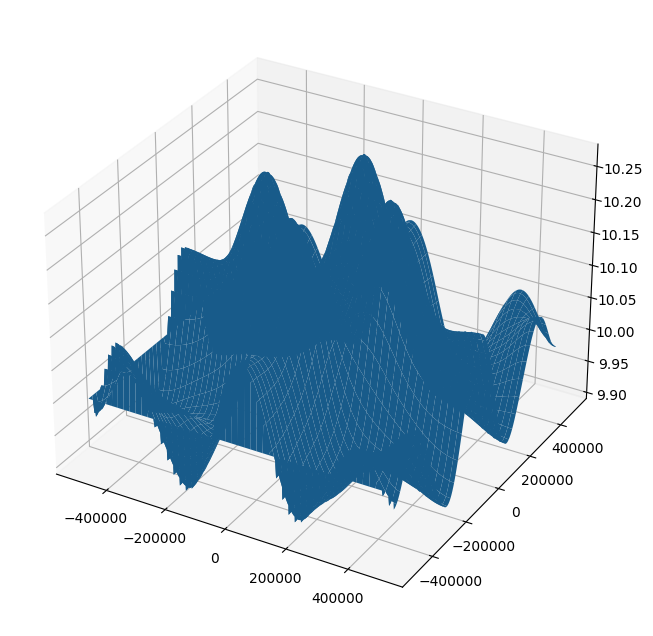

In [47]:
fig = plt.figure(figsize = (8, 8), facecolor = "white")
ax = fig.add_subplot(111, projection='3d')
def make_frame(t):
    ax.clear()
    ax.plot_surface(np.array(grid_x), np.array(grid_y), np.array(height_list_plot)[round(t)])
    
    return mplfig_to_npimage(fig)

duration=25
animation = VideoClip(make_frame, duration = duration)
animation.ipython_display(fps = 20, loop = True, autoplay = True)
plt.show()